In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
xrp_df = pd.read_csv(Path('../../resources/prices/coin_XRP.csv'), index_col='SNo')
xrp_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07
2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07
3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07
4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07
5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...,...,...,...
2760,XRP,XRP,2021-02-23 23:59:59,0.570989,0.379302,0.570989,0.473563,1.435902e+10,2.150165e+10
2761,XRP,XRP,2021-02-24 23:59:59,0.499370,0.454759,0.474201,0.471832,8.015469e+09,2.142305e+10
2762,XRP,XRP,2021-02-25 23:59:59,0.482517,0.429103,0.471776,0.434524,5.952354e+09,1.972912e+10


In [4]:
xrp_df['Date'] = pd.to_datetime(xrp_df['Date']).dt.date
xrp_df['Date'] = pd.to_datetime(xrp_df['Date'])
xrp_df['Spread'] = xrp_df.High - xrp_df.Low
xrp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 1 to 2764
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2764 non-null   object        
 1   Symbol     2764 non-null   object        
 2   Date       2764 non-null   datetime64[ns]
 3   High       2764 non-null   float64       
 4   Low        2764 non-null   float64       
 5   Open       2764 non-null   float64       
 6   Close      2764 non-null   float64       
 7   Volume     2764 non-null   float64       
 8   Marketcap  2764 non-null   float64       
 9   Spread     2764 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 237.5+ KB


## Plot the closing value of XRP over time

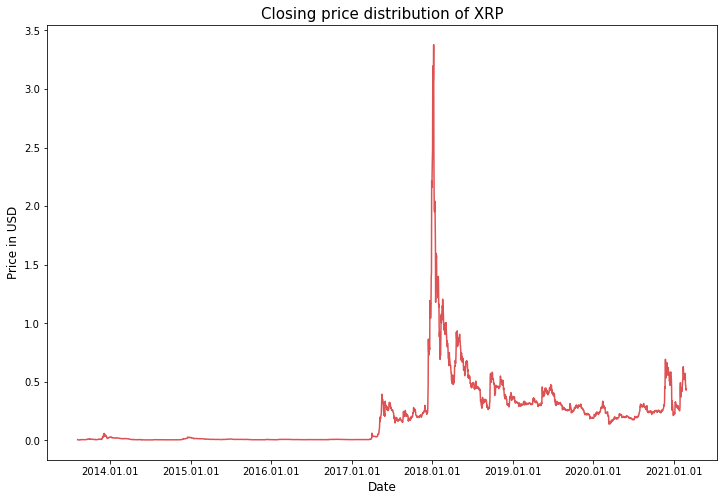

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = xrp_df.Close.values, x=xrp_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = xrp_df.Close.values, x=xrp_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of XRP", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

xrp_df['Date_mpl'] = xrp_df['Date'].apply(lambda x: mdates.date2num(x))

temp_xrp_df = xrp_df.copy(deep=False)
temp_xrp_df = temp_xrp_df.set_index(['Date'])
temp_xrp_df = temp_xrp_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_xrp_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2013-08-05,0.005980,0.005613,0.005875,0.005613,0.000000e+00,15922.0
2013-08-06,0.005661,0.004629,0.005637,0.004680,0.000000e+00,15923.0
2013-08-07,0.004682,0.004333,0.004669,0.004417,0.000000e+00,15924.0
2013-08-08,0.004424,0.004175,0.004397,0.004254,0.000000e+00,15925.0
2013-08-09,0.004367,0.004253,0.004257,0.004291,0.000000e+00,15926.0
...,...,...,...,...,...,...
2021-02-23,0.570989,0.379302,0.570989,0.473563,1.435902e+10,18681.0
2021-02-24,0.499370,0.454759,0.474201,0.471832,8.015469e+09,18682.0
2021-02-25,0.482517,0.429103,0.471776,0.434524,5.952354e+09,18683.0


/Users/arttucker/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


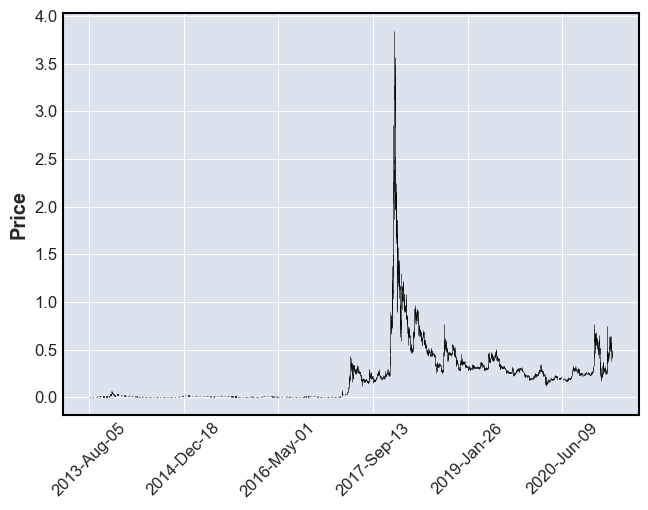

In [7]:
mpf.plot(temp_xrp_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_XRP.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2789,2021-03-25 23:59:59,0.243203,0.034643,0.445668
2790,2021-03-26 23:59:59,0.244569,0.038918,0.463597
2791,2021-03-27 23:59:59,0.244831,0.039018,0.463067
2792,2021-03-28 23:59:59,0.243873,0.022480,0.458275
2793,2021-03-29 23:59:59,0.240778,0.024403,0.448805


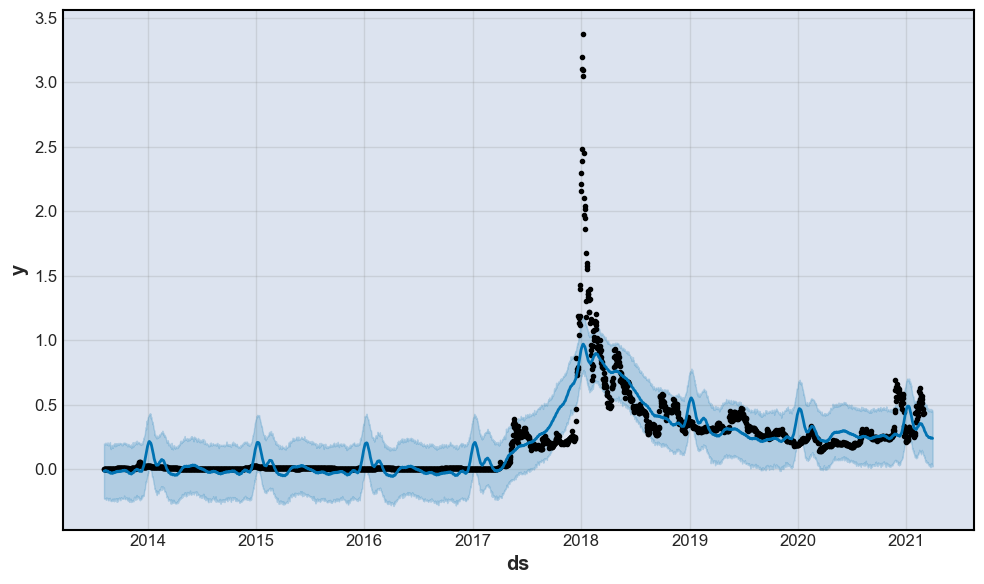

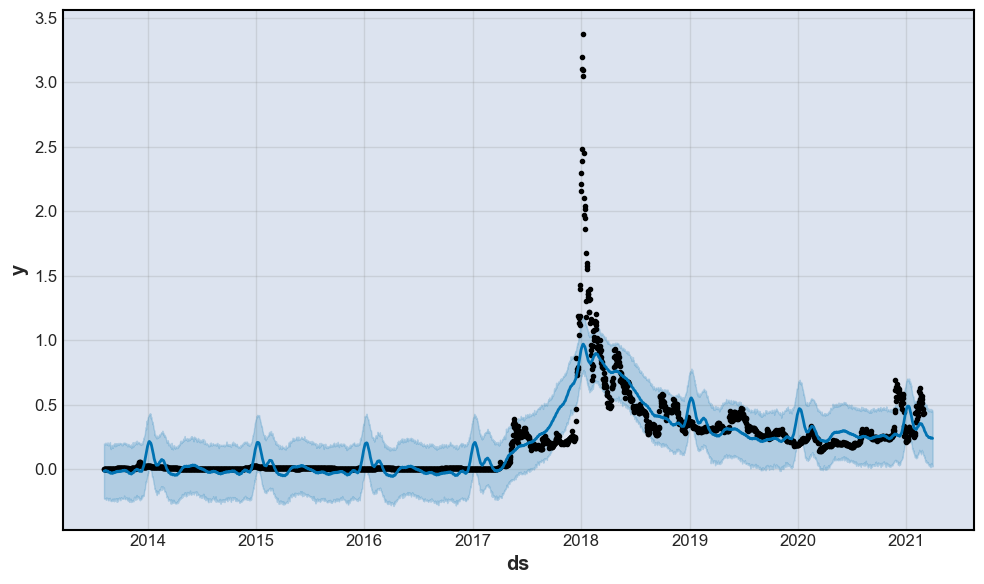

In [10]:
m.plot(forecast)

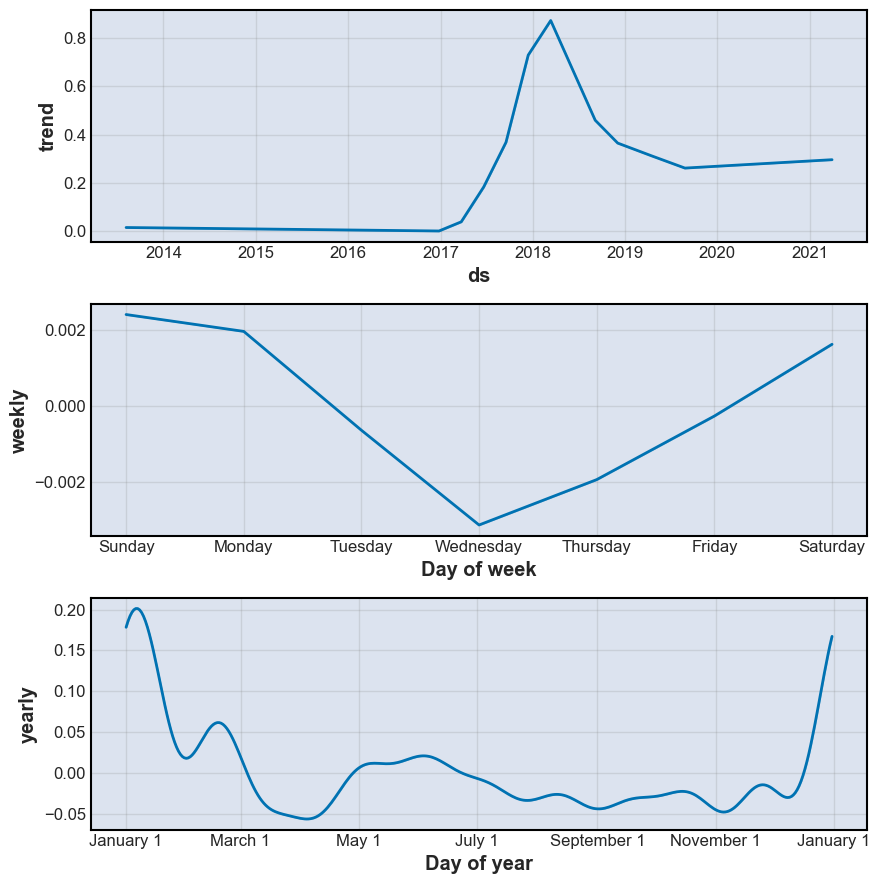

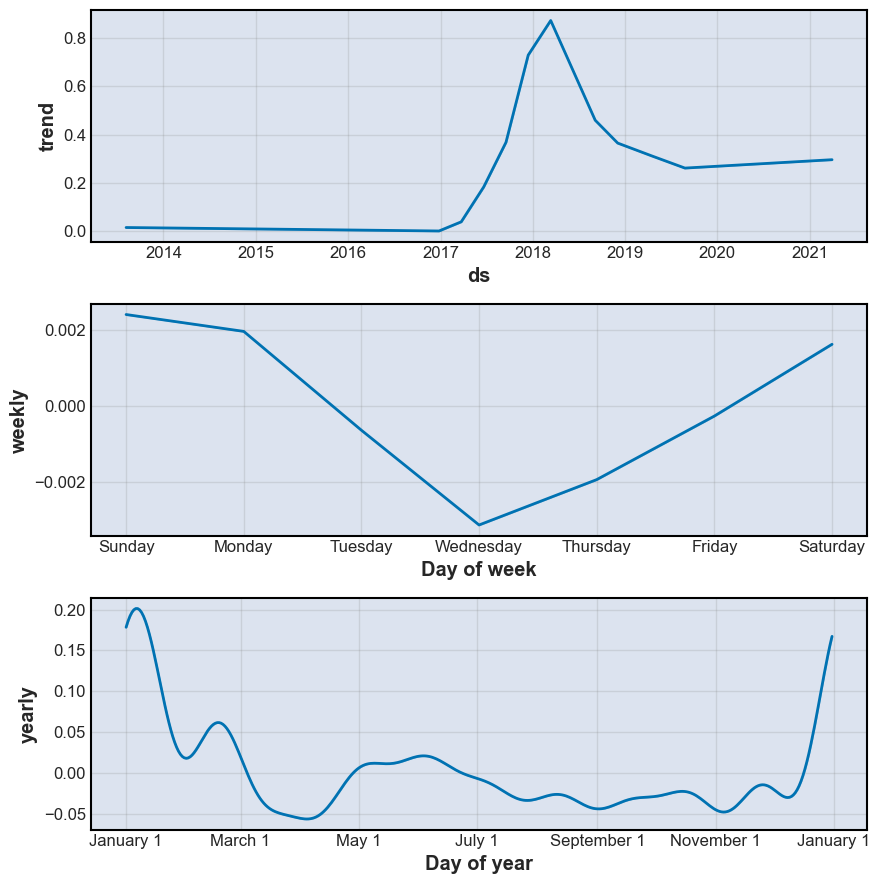

In [11]:
m.plot_components(forecast)